# EDA + Wstępne czyszczenie danych - WEC Lap Data

Analiza danych z wyścigów WEC. Sprawdzam jak wyglądają dane i czyści je.

1. Wczytanie danych
2. Sprawdzenie struktury
3. Znalezienie targetu (czas okrążeń)
4. Wizualizacje
5. Czyszczenie danych
6. Wybór metryki


In [1]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Ustawienia
pd.set_option('display.max_columns', None)

print("Gotowe")


Gotowe


## 1. Wczytanie danych


In [2]:
# Wczytanie danych
df = pd.read_csv('../data/01_raw/wec_lap_data_sample.csv')

print(f"Rozmiar: {df.shape[0]} wierszy × {df.shape[1]} kolumn")
print(f"Kolumny: {list(df.columns)}")

df.head()


Rozmiar: 1000 wierszy × 48 kolumn
Kolumny: ['Unnamed: 0', 'number', 'driver_number', 'lap_number', 'lap_time', 'lap_improvement', 'crossing_finish_line_in_pit', 's1', 's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'kph', 'elapsed', 'hour', 's1_large', 's2_large', 's3_large', 'top_speed', 'driver_name', 'pit_time', 'class', 'group', 'team', 'manufacturer', 'season', 'circuit', 'round', 'vehicle', 'flag_at_fl', 'team_no', 'lap_time_ms', 'lap_time_s', 'engine', 'driver_stint_no', 'driver_stint', 'team_stint_no', 'team_stint', 'elapsed_ms', 'position', 'class_position', 'interval_ms', 'interval', 'gap', 'class_interval', 'class_gap', 'elapsed_s']


,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,s3,s3_improvement,kph,elapsed,hour,s1_large,s2_large,s3_large,top_speed,driver_name,pit_time,class,group,team,manufacturer,season,circuit,round,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine,driver_stint_no,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
0,332256,86,1,74,0 days 00:01:43.936000,0,NaN,22.769,0,32.167,0,49.000,0,158.0,0 days 02:20:17.276000,13:18:40.480,0 days 00:00:22.769000,0 days 00:00:32.167000,0 days 00:00:49,266.0,Michael WAINWRIGHT,NaN,LMGTE Am,NaN,Gulf Racing,Porsche,2018-2019,FUJI SPEEDWAY,4,Porsche 911 RSR-19,NaN,Gulf Racing #86,103936.0,103.936,Porsche,1,Michael WAINWRIGHT Stint #1,4,Gulf Racing #86 Stint #4,8417276,25.0,1.0,75403.0,75.403,809.805,0.000,0.000,8417.276
1,161880,8,2,127,0 days 00:01:39.625000,0,NaN,47.682,0,36.208,0,15.735,0,185.6,0 days 03:50:07.821000,16:49,0 days 00:00:47.682000,0 days 00:00:36.208000,0 days 00:00:15.735000,313.7,Oliver JARVIS,NaN,LMP1,H,Audi Sport Team Joest,Audi,2015,NURBURGRING,4,Audi R18 e-tron quattro,NaN,Audi Sport Team Joest #8,99625.0,99.625,Audi,2,Oliver JARVIS Stint #2,5,Audi Sport Team Joest #8 Stint #5,13807821,4.0,4.0,31006.0,31.006,115.846,31.006,115.846,13807.821
2,456701,36,1,253,0 days 00:03:35.407000,0,NaN,33.580,0,81.924,0,99.903,0,227.7,0 days 16:57:45.640000,08:57:45.640,0 days 00:00:33.580000,0 days 00:01:21.924000,0 days 00:01:39.903000,318.2,André NEGRÃO,NaN,HYPERCAR,NaN,Alpine Elf Matmut,Alpine,2021,LE MANS,4,Alpine A480,NaN,Alpine Elf Matmut #36,215407.0,215.407,Gibson,8,André NEGRÃO Stint #8,22,Alpine Elf Matmut #36 Stint #22,61065640,3.0,3.0,1026862.0,1026.862,1095.407,1026.862,1095.407,61065.640
3,423810,54,1,16,0 days 00:02:19.775000,0,NaN,39.990,0,64.012,0,35.773,0,180.4,0 days 00:37:38.114000,14:07:39.682,0 days 00:00:39.990000,0 days 00:01:04.012000,0 days 00:00:35.773000,263.0,Thomas FLOHR,NaN,LMGTE Am,NaN,AF Corse,Ferrari,2021,SPA FRANCORCHAMPS,1,Ferrari 488 GTE Evo,NaN,AF Corse #54,139775.0,139.775,Ferrari,1,Thomas FLOHR Stint #1,1,AF Corse #54 Stint #1,2258114,29.0,8.0,17974.0,17.974,235.302,17.974,51.331,2258.114
4,436233,31,1,268,0 days 00:01:39.540000,0,B,29.257,0,30.172,0,40.111,0,168.3,0 days 07:15:15.938000,18:15:33.420,0 days 00:00:29.257000,0 days 00:00:30.172000,0 days 00:00:40.111000,298.3,Robin FRIJNS,NaN,LMP2,NaN,Team WRT,Oreca,2021,AUTODROMO DO ALGARVE,2,Oreca 07,NaN,Team WRT #31,99540.0,99.540,Gibson,3,Robin FRIJNS Stint #3,11,Team WRT #31 Stint #11,26115938,6.0,3.0,41709.0,41.709,415.899,41.709,51.309,26115.938


## 2. Sprawdzenie struktury


In [3]:
# Sprawdzenie typów danych i brakujących wartości
print("Typy danych:")
print(df.dtypes.value_counts())

print("\nBrakujące wartości:")
missing = df.isnull().sum()
print(missing[missing > 0])


Typy danych:
object     21
float64    15
int64      12
Name: count, dtype: int64

Brakujące wartości:
crossing_finish_line_in_pit    948
s2                               1
s3                               1
s2_large                         1
s3_large                         1
top_speed                        3
pit_time                       948
group                          837
flag_at_fl                     943
dtype: int64


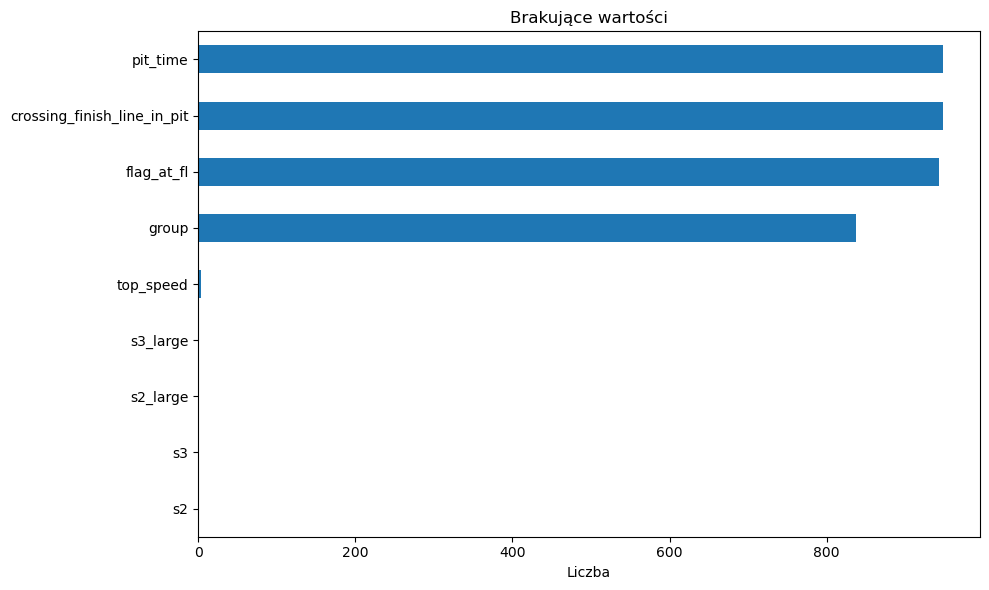

In [4]:
# Wizualizacja brakujących wartości
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data_plot = missing_data[missing_data > 0].sort_values(ascending=True)
if len(missing_data_plot) > 0:
    missing_data_plot.plot(kind='barh')
    plt.title('Brakujące wartości')
    plt.xlabel('Liczba')
    plt.tight_layout()
    plt.show()
else:
    print("Brak brakujących wartości!")


## 3. Target - czas okrążeń


In [5]:
# Sprawdzenie zmiennych związanych z czasem
time_columns = [col for col in df.columns if 'time' in col.lower() or 'lap' in col.lower()]
print("Kolumny z czasem:", time_columns)

# Analiza targetu - lap_time
print(f"\nTarget (lap_time):")
print(f"Typ: {df['lap_time'].dtype}")
print(f"Brakujące: {df['lap_time'].isnull().sum()}")

# Konwersja na sekundy
df['lap_time_seconds'] = pd.to_timedelta(df['lap_time']).dt.total_seconds()
print(f"Średni czas: {df['lap_time_seconds'].mean():.2f}s")
print(f"Mediana: {df['lap_time_seconds'].median():.2f}s")


Kolumny z czasem: ['lap_number', 'lap_time', 'lap_improvement', 'elapsed', 'pit_time', 'lap_time_ms', 'lap_time_s', 'elapsed_ms', 'elapsed_s']

Target (lap_time):
Typ: object
Brakujące: 0
Średni czas: 172.28s
Mediana: 128.24s


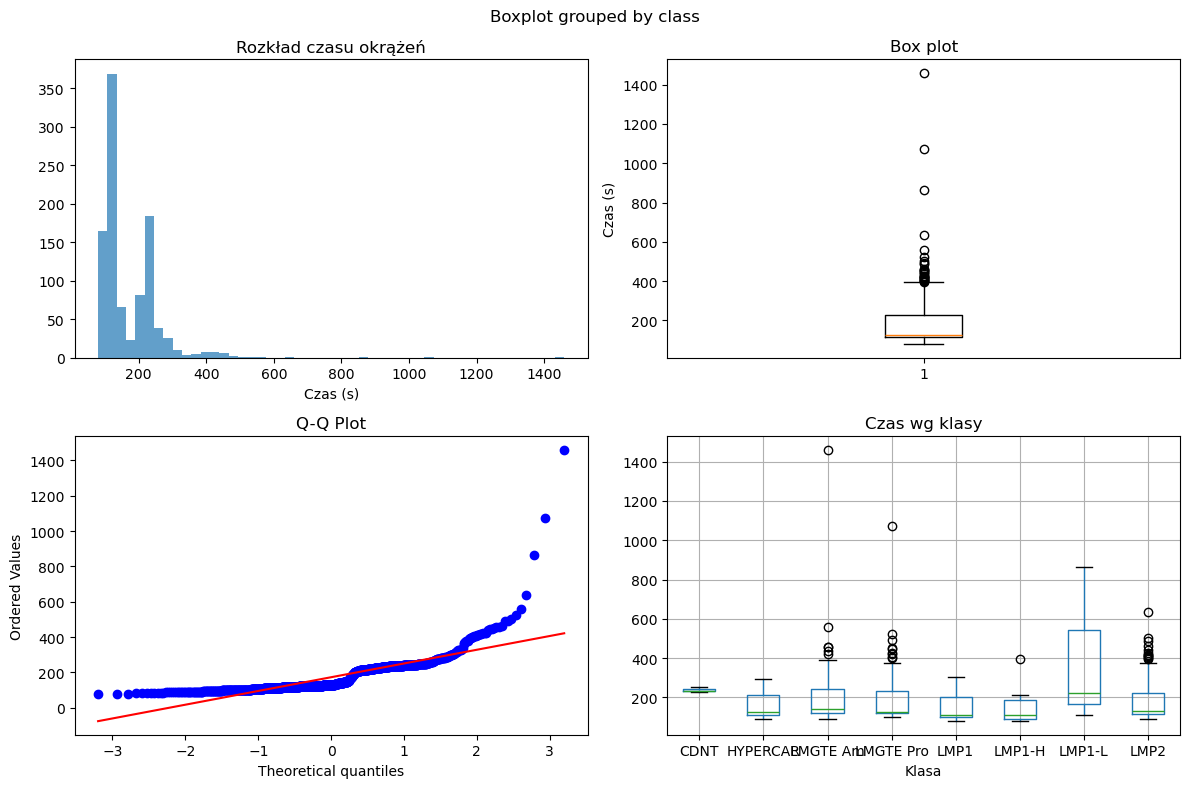

Statystyki:
count    1000.000000
mean      172.277281
std        94.794422
min        79.508000
25%       114.108500
50%       128.242000
75%       227.060750
max      1459.609000
Name: lap_time_seconds, dtype: float64


In [6]:
# Wizualizacja rozkładu czasu okrążeń
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram
axes[0,0].hist(df['lap_time_seconds'], bins=50, alpha=0.7)
axes[0,0].set_title('Rozkład czasu okrążeń')
axes[0,0].set_xlabel('Czas (s)')

# Box plot
axes[0,1].boxplot(df['lap_time_seconds'])
axes[0,1].set_title('Box plot')
axes[0,1].set_ylabel('Czas (s)')

# Q-Q plot
from scipy import stats
stats.probplot(df['lap_time_seconds'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot')

# Czas wg klasy samochodu
if 'class' in df.columns:
    df.boxplot(column='lap_time_seconds', by='class', ax=axes[1,1])
    axes[1,1].set_title('Czas wg klasy')
    axes[1,1].set_xlabel('Klasa')

plt.tight_layout()
plt.show()

print("Statystyki:")
print(df['lap_time_seconds'].describe())


## 4. Wizualizacje


In [7]:
# Sprawdzenie cech numerycznych i kategorycznych
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Cechy numeryczne: {len(numeric_columns)}")
print(f"Cechy kategoryczne: {len(categorical_columns)}")

# Sprawdzenie kategorii
print("\nKategorie:")
for col in categorical_columns[:5]:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} wartości")
    if unique_count <= 10:
        print(f"  {df[col].unique()[:5]}")


Cechy numeryczne: 28
Cechy kategoryczne: 21

Kategorie:
lap_time: 990 wartości
crossing_finish_line_in_pit: 1 wartości
  [nan 'B']
elapsed: 1000 wartości
hour: 928 wartości
s1_large: 972 wartości


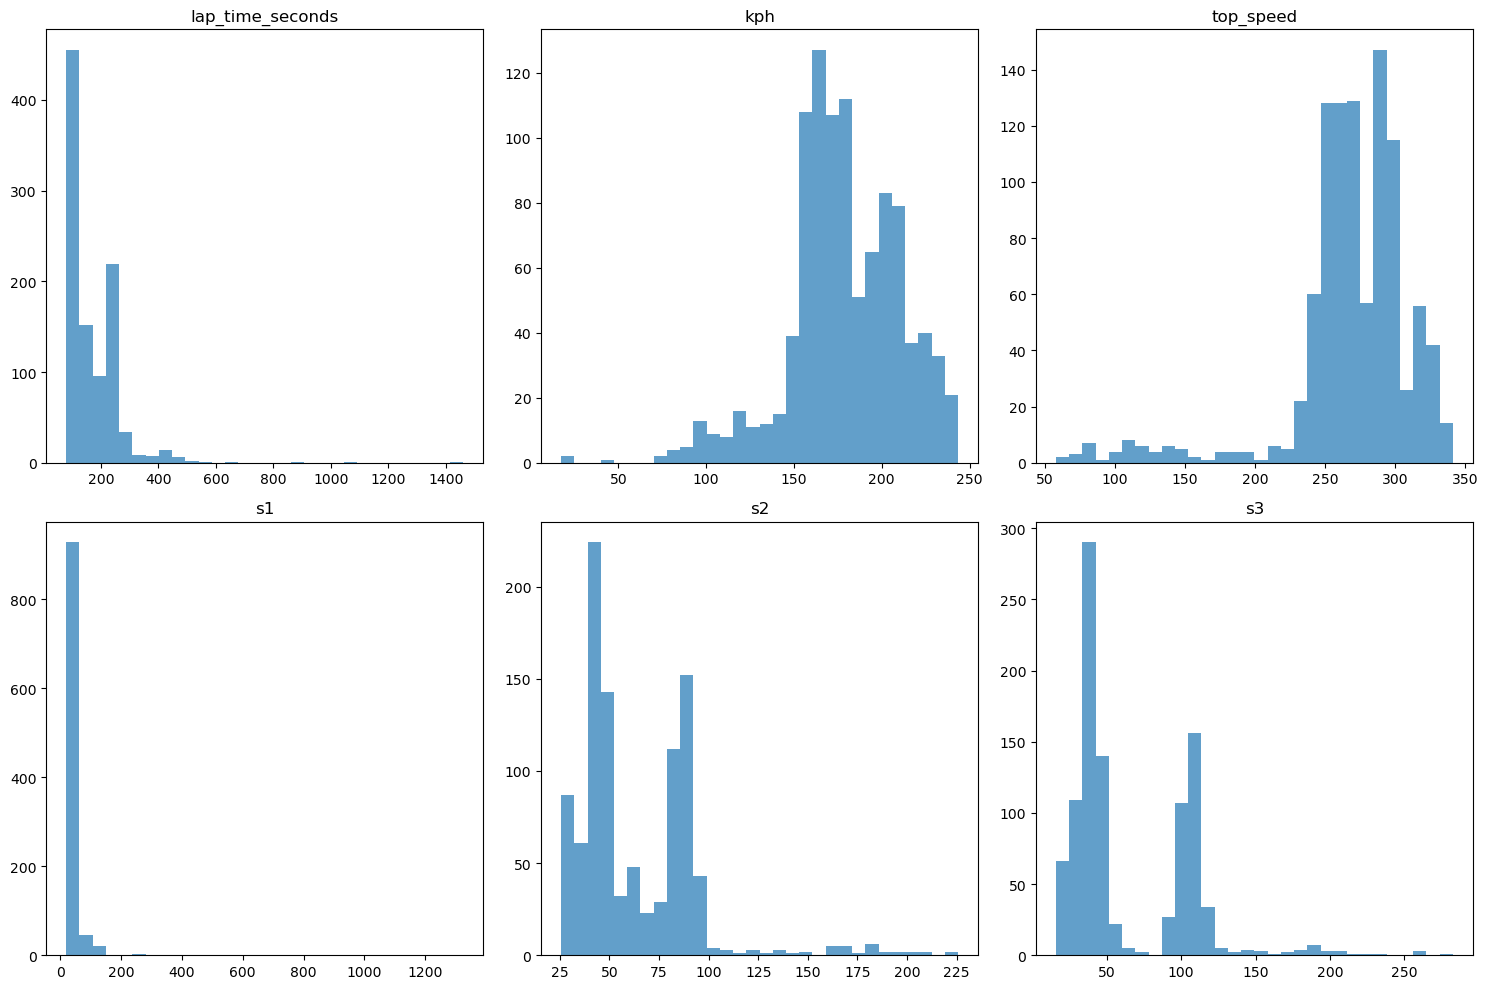

Korelacje z czasem okrążeń:
lap_time_ms         1.000000
lap_time_seconds    1.000000
lap_time_s          1.000000
s2                  0.781932
s3                  0.764021
s1                  0.684132
gap                 0.455032
elapsed_ms          0.448113
elapsed_s           0.448113
team_stint_no       0.422798
dtype: float64


In [8]:
# Wizualizacja wybranych cech
important_numeric = ['lap_time_seconds', 'kph', 'top_speed', 's1', 's2', 's3']
available_numeric = [col for col in important_numeric if col in df.columns]

if available_numeric:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(available_numeric[:6]):
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7)
            axes[i].set_title(f'{col}')
    
    # Ukrycied nieużywanych subplot
    for i in range(len(available_numeric), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Korelacje z czasem okrążeń
print("Korelacje z czasem okrążeń:")
correlations = df[numeric_columns].corrwith(df['lap_time_seconds']).abs().sort_values(ascending=False)
print(correlations.head(10))


## 5. Czyszczenie danych


In [9]:
# Tworzenie kopii do czyszczenia
df_clean = df.copy()
print(f"Przed czyszczeniem: {df_clean.shape}")

# 1. Usuwanie kolumn z dużą liczbą brakujących wartości (>50%)
print("\n1. Usuwanie kolumn z >50% brakujących wartości:")
cols_to_drop = []
for col in df_clean.columns:
    missing_pct = df_clean[col].isnull().sum() / len(df_clean)
    if missing_pct > 0.5:
        cols_to_drop.append(col)
        print(f"  Usuwam '{col}' - {missing_pct:.1%} brakujących")

df_clean = df_clean.drop(columns=cols_to_drop)
print(f"Usunięto {len(cols_to_drop)} kolumn. Nowy rozmiar: {df_clean.shape}")

# 2. Usuwanie kolumn stałych (tylko jedna wartość)
print("\n2. Usuwanie kolumn stałych:")
constant_cols = []
for col in df_clean.columns:
    if df_clean[col].nunique() <= 1:
        constant_cols.append(col)
        print(f"  Usuwam '{col}' - stała wartość")

df_clean = df_clean.drop(columns=constant_cols)
print(f"Usunięto {len(constant_cols)} kolumn. Nowy rozmiar: {df_clean.shape}")


Przed czyszczeniem: (1000, 49)

1. Usuwanie kolumn z >50% brakujących wartości:
  Usuwam 'crossing_finish_line_in_pit' - 94.8% brakujących
  Usuwam 'pit_time' - 94.8% brakujących
  Usuwam 'group' - 83.7% brakujących
  Usuwam 'flag_at_fl' - 94.3% brakujących
Usunięto 4 kolumn. Nowy rozmiar: (1000, 45)

2. Usuwanie kolumn stałych:
Usunięto 0 kolumn. Nowy rozmiar: (1000, 45)


In [10]:
# 3. Uzupełnianie brakujących wartości w cechach numerycznych (mediana)
print("\n3. Uzupełnianie brakujących wartości numerycznych:")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"  '{col}': {missing_count} wartości → mediana {median_val:.2f}")

# 4. Uzupełnianie brakujących wartości w cechach kategorycznych (moda)
print("\n4. Uzupełnianie brakujących wartości kategorycznych:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        mode_val = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"  '{col}': {missing_count} wartości → moda '{mode_val}'")

print(f"\nPo uzupełnieniu: {df_clean.shape}")
print(f"Pozostałe brakujące: {df_clean.isnull().sum().sum()}")



3. Uzupełnianie brakujących wartości numerycznych:
  's2': 1 wartości → mediana 51.46
  's3': 1 wartości → mediana 44.06
  'top_speed': 3 wartości → mediana 271.80

4. Uzupełnianie brakujących wartości kategorycznych:
  's2_large': 1 wartości → moda '0 days 00:00:27.370000'
  's3_large': 1 wartości → moda '0 days 00:00:33.688000'

Po uzupełnieniu: (1000, 45)
Pozostałe brakujące: 0



5. Wykrywanie wartości odstających:
  lap_time_seconds: 28 outlierów (2.8%)
  kph: 25 outlierów (2.5%)
  top_speed: 60 outlierów (6.0%)
  s1: 216 outlierów (21.6%)
  s2: 29 outlierów (2.9%)
  s3: 10 outlierów (1.0%)

Uwaga: s1 ma dużo outlierów (21.6%), to może być spowodowane różnymi torami i warunkami.


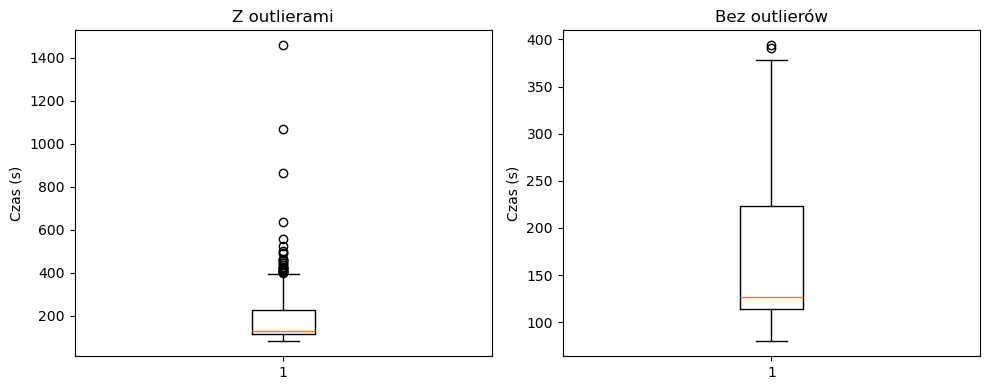


Outliery w czasie okrążeń: 28 (2.8%)
Rozmiar bez outlierów: 972
Nie usuwam outlierów - mogą być ważne dla modelu (różne tory, warunki pogodowe)


In [11]:
# 5. Wykrywanie wartości odstających
print("\n5. Wykrywanie wartości odstających:")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Sprawdzenie outlierów w kluczowych cechach
important_numeric = ['lap_time_seconds', 'kph', 'top_speed', 's1', 's2', 's3']
for col in important_numeric:
    if col in df_clean.columns:
        outliers, lower, upper = detect_outliers_iqr(df_clean, col)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df_clean)) * 100
        print(f"  {col}: {outlier_count} outlierów ({outlier_pct:.1f}%)")

print("\nUwaga: s1 ma dużo outlierów (21.6%), to może być spowodowane różnymi torami i warunkami.")

# Wizualizacja outlierów dla czasu okrążeń
if 'lap_time_seconds' in df_clean.columns:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(df_clean['lap_time_seconds'])
    plt.title('Z outlierami')
    plt.ylabel('Czas (s)')
    
    outliers, lower, upper = detect_outliers_iqr(df_clean, 'lap_time_seconds')
    df_no_outliers = df_clean[(df_clean['lap_time_seconds'] >= lower) & 
                              (df_clean['lap_time_seconds'] <= upper)]
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df_no_outliers['lap_time_seconds'])
    plt.title('Bez outlierów')
    plt.ylabel('Czas (s)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nOutliery w czasie okrążeń: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")
    print(f"Rozmiar bez outlierów: {len(df_no_outliers)}")
    print(f"Nie usuwam outlierów - mogą być ważne dla modelu (różne tory, warunki pogodowe)")


In [12]:
# 6. Enkodowanie cech kategorycznych
print("\n6. Enkodowanie cech kategorycznych:")

categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("Cechy do enkodowania:")
for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    print(f"  {col}: {unique_count} wartości")

# Label Encoding dla cech z małą liczbą kategorii (≤20)
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    if unique_count <= 20:
        le = LabelEncoder()
        df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col].astype(str))
        le_dict[col] = le
        print(f"  Zakodowano {col} → {col}_encoded")

print(f"\nPo enkodowaniu: {df_clean.shape}")
print(f"Nowe kolumny: {[col for col in df_clean.columns if col.endswith('_encoded')]}")



6. Enkodowanie cech kategorycznych:
Cechy do enkodowania:
  lap_time: 990 wartości
  elapsed: 1000 wartości
  hour: 928 wartości
  s1_large: 972 wartości
  s2_large: 991 wartości
  s3_large: 990 wartości
  driver_name: 397 wartości
  class: 8 wartości
  team: 137 wartości
  manufacturer: 30 wartości
  season: 10 wartości
  circuit: 20 wartości
  vehicle: 54 wartości
  team_no: 231 wartości
  engine: 17 wartości
  driver_stint: 738 wartości
  team_stint: 765 wartości
  Zakodowano class → class_encoded
  Zakodowano season → season_encoded
  Zakodowano circuit → circuit_encoded
  Zakodowano engine → engine_encoded

Po enkodowaniu: (1000, 49)
Nowe kolumny: ['class_encoded', 'season_encoded', 'circuit_encoded', 'engine_encoded']


## 6. Wybór metryki

Problem: Regresja- przewidywanie czasu okrążeń (zmienna ciągła)


Analiza rozkładu czasu okrążeń:
Test Shapiro-Wilka: p-value=0.0000
Rozkład nie jest normalny
Skośność: 4.5745 (prawostronna)
Kurtoza: 44.9547 (cięższe ogony)
Rozkład jest silnie skośny - MAE jest dobrym wyborem metryki (odporna na outliery)


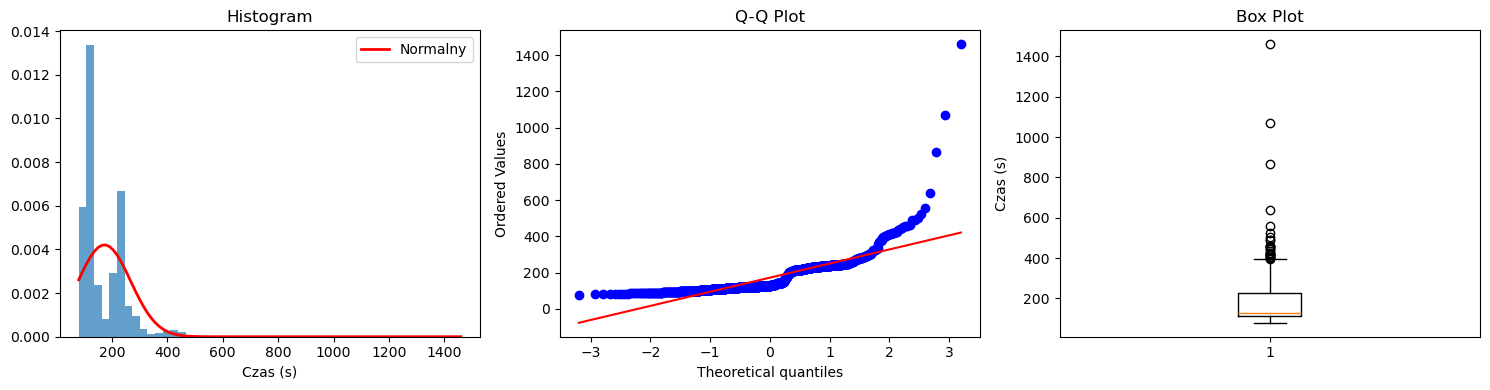

In [13]:
# Sprawdzenie rozkładu czasu okrążeń
print("Analiza rozkładu czasu okrążeń:")

if 'lap_time_seconds' in df_clean.columns:
    from scipy import stats
    
    # Test normalności
    if len(df_clean) < 5000:
        shapiro_stat, shapiro_p = stats.shapiro(df_clean['lap_time_seconds'].sample(min(5000, len(df_clean))))
        print(f"Test Shapiro-Wilka: p-value={shapiro_p:.4f}")
        print(f"Rozkład {'jest' if shapiro_p > 0.05 else 'nie jest'} normalny")
    
    # Skośność i kurtoza
    skewness = stats.skew(df_clean['lap_time_seconds'])
    kurtosis = stats.kurtosis(df_clean['lap_time_seconds'])
    print(f"Skośność: {skewness:.4f} (prawostronna)")
    print(f"Kurtoza: {kurtosis:.4f} (cięższe ogony)")
    print(f"Rozkład jest silnie skośny - MAE jest dobrym wyborem metryki (odporna na outliery)")
    
    # Wizualizacja
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram z krzywą normalną
    axes[0].hist(df_clean['lap_time_seconds'], bins=50, density=True, alpha=0.7)
    mu, sigma = df_clean['lap_time_seconds'].mean(), df_clean['lap_time_seconds'].std()
    x = np.linspace(df_clean['lap_time_seconds'].min(), df_clean['lap_time_seconds'].max(), 100)
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normalny')
    axes[0].set_title('Histogram')
    axes[0].set_xlabel('Czas (s)')
    axes[0].legend()
    
    # Q-Q plot
    stats.probplot(df_clean['lap_time_seconds'], dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot')
    
    # Box plot
    axes[2].boxplot(df_clean['lap_time_seconds'])
    axes[2].set_title('Box Plot')
    axes[2].set_ylabel('Czas (s)')
    
    plt.tight_layout()
    plt.show()


### Wybrane metryki:

1. MAE (Mean Absolute Error) - główna
- Interpretowalne w sekundach, odporne na outliery

2. RMSE (Root Mean Square Error) - dodatkowa
- Kara za duże błędy (ważne w wyścigach)

3. R² (Coefficient of Determination) - dodatkowa
- Jak dobrze model wyjaśnia dane

4. MAPE (Mean Absolute Percentage Error) - dodatkowa
- Błąd w procentach


In [14]:
# Funkcja do obliczania metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

print("Funkcja calculate_regression_metrics() gotowa")

# Podsumowanie czyszczenia
print(f"\nPodsumowanie:")
print(f"Przed czyszczeniem: {df.shape}")
print(f"Po czyszczeniu: {df_clean.shape}")
print(f"Usunięto kolumn: 4 (crossing_finish_line_in_pit, pit_time, group, flag_at_fl)")
print(f"Dodano kolumn zakodowanych: 4 (class, season, circuit, engine)")
print(f"Brakujące wartości: {df_clean.isnull().sum().sum()}")

# Zapisanie danych
import os
os.makedirs('../data/02_processed', exist_ok=True)
output_path = '../data/02_processed/wec_lap_data_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"\nDane zapisane do: {output_path}")


Funkcja calculate_regression_metrics() gotowa

Podsumowanie:
Przed czyszczeniem: (1000, 49)
Po czyszczeniu: (1000, 49)
Usunięto kolumn: 4 (crossing_finish_line_in_pit, pit_time, group, flag_at_fl)
Dodano kolumn zakodowanych: 4 (class, season, circuit, engine)
Brakujące wartości: 0

Dane zapisane do: ../data/02_processed/wec_lap_data_cleaned.csv


## 7. Podsumowanie

Sprawdziłem dane, znalazłem target (czas okrążeń), zrobiłem wizualizacje i wyczyściłem dane. 
Usunąłem 4 kolumny z dużą liczbą brakujących wartości (>50%).
Uzupełniłem brakujące wartości medianą dla numerycznych i modą dla kategorycznych.
Wykryłem outliery (2.8% dla czasu okrążeń, 21.6% dla s1) - nie usuwam ich, bo mogą być ważne dla modelu (reprezentują różne tory, warunki pogodowe, sytuacje wyścigowe).
Zakodowałem 4 cechy kategoryczne (class, season, circuit, engine).

Rozkład czasu okrążeń jest silnie skośny (skośność 4.57), więc MAE jest dobrym wyborem metryki.

Wybrane metryki: MAE (główna), RMSE, R², MAPE.